In [1]:
# raw images folder
srcDir1 = "C:\\Users\\gokel\\OneDrive\\Documents\\CU\\ProjectStudents\\Dayo\\WaterPictures\\Clean_Cropped"
srcDir2 = "C:\\Users\\gokel\\OneDrive\\Documents\\CU\\ProjectStudents\\Dayo\\WaterPictures\\Dirty_Cropped"

# dataset file name
datasetFileName = "dataset.npz"


In [2]:
def getImageSize(img, r=1):
    (w, h) = img.size
    return int(w/r), int(h/r)

def getSize(size, factor=1):
    (h, w) = size
    return int(h*factor), int(w*factor)

In [3]:
import os
from PIL import Image

def getMinWidthHeight(srcDir):
    srcList = os.listdir(srcDir)
    fname = srcList[0]
    filePath = os.path.join(srcDir, fname)
    img = Image.open(filePath)
    (oh, ow) = img.size

    for fname in srcList:
        filePath = os.path.join(srcDir, fname)

        img = Image.open(filePath)
        (h, w) = img.size

        if h < oh:
            oh = h
        if w < ow:
            ow = w
        
        return (oh, ow)


In [4]:
import os
from PIL import Image
import numpy as np

def createDataset(dataImages, dataLabels, srcDir, label1, gray=True, size=None):
    srcList = os.listdir(srcDir)
    for fname in srcList:
        filePath = os.path.join(srcDir, fname)

        img = Image.open(filePath)

        if size != None:
            imgRes = img.resize(size)
        else:
            imgRes = img
        
        if gray == True:
            imgGray = imgRes.convert('L')
            data1 = np.array(imgGray)
            data1 = np.rollaxis(data1, 0,2)
        else:
            data1 = np.array(imgRes)
            data1 = np.rollaxis(data1, 0,2)
        
        dataImages.append(data1)
        dataLabels.append(label1)
        

In [5]:
import os
from PIL import Image
import numpy as np

# datasetFileName = "dataset.npz"

className = {"clean": 0, "contaminated": 1}

dataImages = []
dataLabels = []

# srcDir1 = "aidata/clean_t"
# srcDir2 = "aidata/contaminated_t"


h1,w1 = getMinWidthHeight(srcDir1)
print(h1,w1)
h2,w2 = getMinWidthHeight(srcDir2)
print(h2,w2)

h = h1
w = w1
if h2 < h:
    h = h2
if w2 < w:
    w = w2

originalSize = (h,w)
print(originalSize)

size = getSize(originalSize, 0.1)

label1 = className["clean"]
createDataset(dataImages, dataLabels, srcDir1, label1, gray=False, size=size)

label2 = className["contaminated"]
createDataset(dataImages, dataLabels, srcDir2, label2, gray=False, size=size)


np.savez_compressed(datasetFileName, images=dataImages, labels=dataLabels)


1110 1118
825 790
(825, 790)


In [6]:
print(len(dataImages))
print(len(dataLabels))


250
250


In [7]:
dataLabels[0]

0

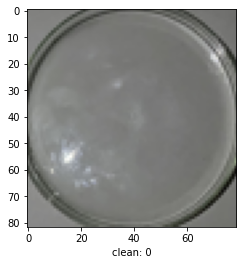

In [8]:
import matplotlib.pyplot as plt

plt.imshow(dataImages[0])
plt.xlabel(f"{list(className.keys())[list(className.values()).index(dataLabels[0])]}: {dataLabels[0]}")
plt.show()

In [9]:
# load dataset file

with np.load(datasetFileName) as data:
    loadedImages = data['images']
    loadedLabels = data['labels']

In [10]:
print(loadedImages.shape)
loadedImages.dtype

(250, 82, 79, 3)


dtype('uint8')

In [11]:
print(loadedLabels.shape)
loadedLabels.dtype

(250,)


dtype('int32')

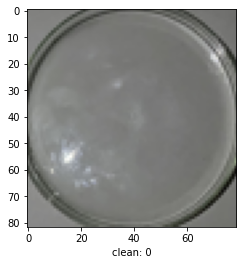

In [12]:
import matplotlib.pyplot as plt

plt.imshow(loadedImages[0])
plt.xlabel(f"{list(className.keys())[list(className.values()).index(loadedLabels[0])]}: {loadedLabels[0]}")
plt.show()